# Web Scraper for Systematic Reviews

In [1]:
import os

temp_folder = os.getenv("temp") + '\\SistRev\\'
os.makedirs(temp_folder, exist_ok=True)

## Keywords to search

In [2]:
# Add keywords / terms to this list to search
search_list = ['webscraping', 'asreview', 'GECAD ISEP']

## Metadata Scraper

In [3]:
from metadataScraper import metadataScraper

files = []

scraper = metadataScraper(download_path=temp_folder)
for search in search_list:
    scraped = scraper.scrape(search)    # returns a list if more than 1000 results found
    
    for file in scraped:
        files.append(file)
    
scraper.quit_driver()
    

External IP is 193.136.62.5, which belongs to the range assigned to IPP (193.136.56.0/21)
We are on webscraping (All Fields) – 28 – Web of Science Core Collection
Number of articles:  28
External IP is 193.136.62.5, which belongs to the range assigned to IPP (193.136.56.0/21)
We are on asreview (All Fields) – 26 – Web of Science Core Collection
Number of articles:  26
External IP is 193.136.62.5, which belongs to the range assigned to IPP (193.136.56.0/21)
We are on GECAD ISEP (All Fields) – 473 – Web of Science Core Collection
Number of articles:  473


## Data Cleaner

In [4]:
from datacleaner import DataCleaner

cleaner = DataCleaner()

# This will be handled by metadata scraper 
data_files_path = ['testdata/no-title.ris', 'testdata/artf-intl-wos.ris']

for file in files:
    cleaner.add_file(file)
    
print('Added all files')
print(f'Total number of articles imported: {cleaner.count_in_entries()}')

Added all files
Total number of articles imported: 527


In [5]:
n_dup, n_no_title, n_no_abst, n_no_doi = cleaner.clean_entries()

print(f'Number of duplicated entries: {n_dup}')
print(f'Number of entries without title: {n_no_title}')
print(f'Number of entries without abstract: {n_no_abst}')
print(f'Number of entries without doi: {n_no_doi}')
print(f'Number of entries after cleanup: {cleaner.count_out_entries()}')

Number of duplicated entries: 0
Number of entries without title: 0
Number of entries without abstract: 7
Number of entries without doi: 203
Number of entries after cleanup: 317


<Axes: title={'center': 'Data Split after Cleanup'}>

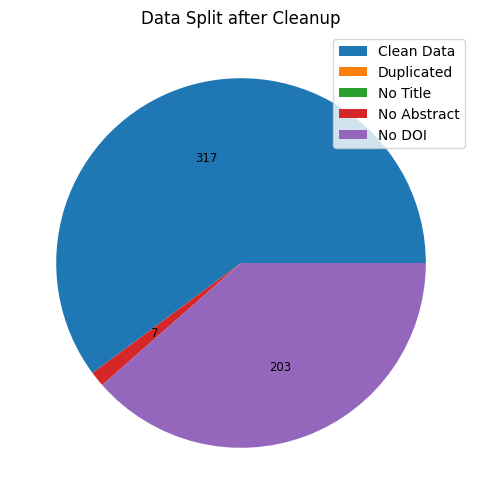

In [6]:
from pandas import Series

ser = Series([cleaner.count_out_entries(), n_dup, n_no_title, n_no_abst, n_no_doi], index=['Clean Data', 'Duplicated', 'No Title', 'No Abstract', 'No DOI'])

ser.plot(kind='pie', title='Data Split after Cleanup', figsize=(6,6), 
         fontsize='small', autopct=lambda x: '{:.0f}'.format(x * ser.sum() / 100) if x > 0 else '', 
         labels=None, legend=True)

In [7]:
# Output file
cleaner.export_data(path=temp_folder)

## ASREVIEW

## PDF Scraper